In [2]:
import pandas as pd
df = pd.read_csv('Pokemon.csv')
df.head()

C:\Users\dell\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
df.groupby('Defense').count()['Name']

Defense
5      2
10     1
15     4
20     4
23     1
      ..
168    1
180    3
184    1
200    2
230    3
Name: Name, Length: 103, dtype: int64

<AxesSubplot:>

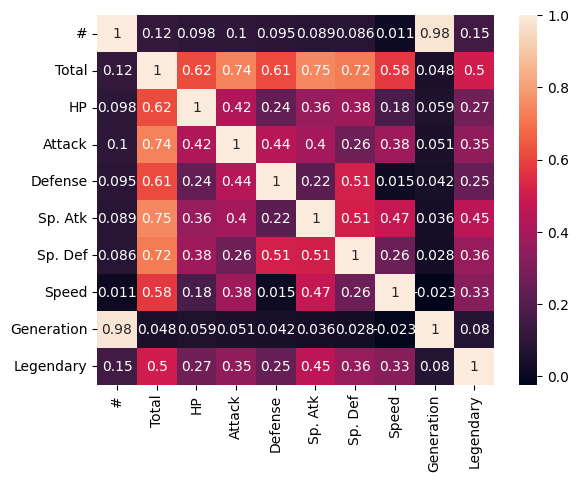

In [8]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

### Model Building

In [94]:
df = pd.read_csv('Pokemon.csv')
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [95]:
df['Type 2'].fillna('Flying',inplace=True)

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Legendary'] = le.fit_transform(df['Legendary'])


In [97]:
df['Legendary'].value_counts()

0    735
1     65
Name: Legendary, dtype: int64

### Data Preprocessing - OneHotEncoding

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline

In [99]:
X = df.iloc[0:,0:-1]
y = df.iloc[0:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)


In [110]:
trf1 = ColumnTransformer(transformers=[
    ('OneHotEncoder',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2])
],remainder='passthrough')

trf2  = DecisionTreeClassifier()

In [111]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

#List of Tuple, Transfomer Name & Object

In [112]:
from sklearn import set_config
set_config(display='diagram')

In [113]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 2])])),
                ('trf2', DecisionTreeClassifier())])

In [114]:
y_pred = pipe.predict(X_test)

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       219
           1       0.55      0.52      0.54        21

    accuracy                           0.92       240
   macro avg       0.75      0.74      0.75       240
weighted avg       0.92      0.92      0.92       240



In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[210,   9],
       [ 10,  11]], dtype=int64)

In [121]:
Sensitivity = 210/(210+9)
Sensitivity

0.958904109589041

##  Reading Diabetes CSV

In [127]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

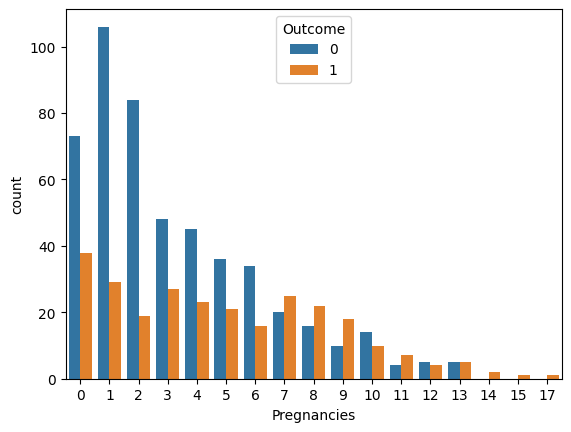

In [133]:
pregancy_data=data.groupby(['Pregnancies','Outcome'])['Outcome'].count().reset_index(name="count")
sns.barplot(data=pregancy_data,x='Pregnancies',y='count',hue='Outcome')

In [135]:
import numpy as np
from math import e
import pandas as pd   

""" Usage: pandas_entropy(df['column1']) """

def pandas_entropy(column, base=None):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    base = e if base is None else base
    return -(vc * np.log(vc)/np.log(base)).sum()

In [139]:
pandas_entropy('DiabetesPedigreeFunction')

-0.0